# Advertising Sales Channel Prediction Case Study

###### When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

## Importing Libraries

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [4]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.shape

(200, 5)

In [8]:
# checking columns
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
# checking null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

#checking null values through HeatMap

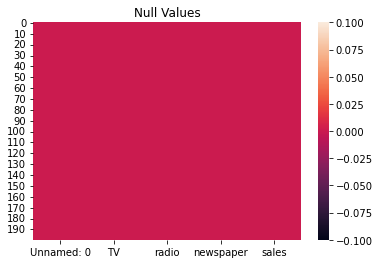

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

#No null vlues present in the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


All the datas are in float

# EDA

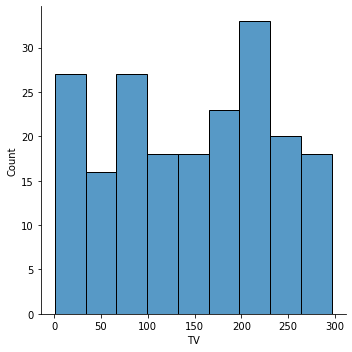

In [12]:
sns.displot(df['TV'])

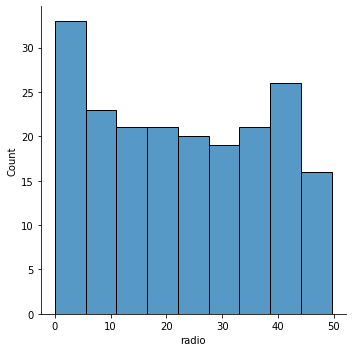

In [13]:
sns.displot(df['radio'],kind='hist')

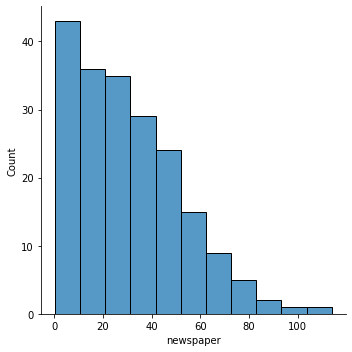

In [15]:
sns.displot(df['newspaper'],kind='hist')

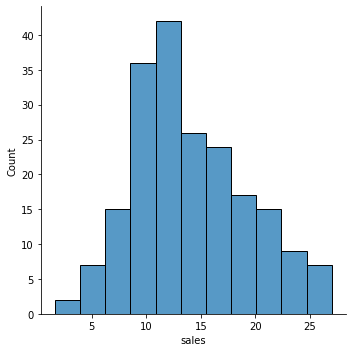

In [16]:
sns.displot(df['sales'],kind='hist')

the sales is normally distributed 

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'TV'}>],
       [<AxesSubplot:title={'center':'radio'}>,
        <AxesSubplot:title={'center':'newspaper'}>],
       [<AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

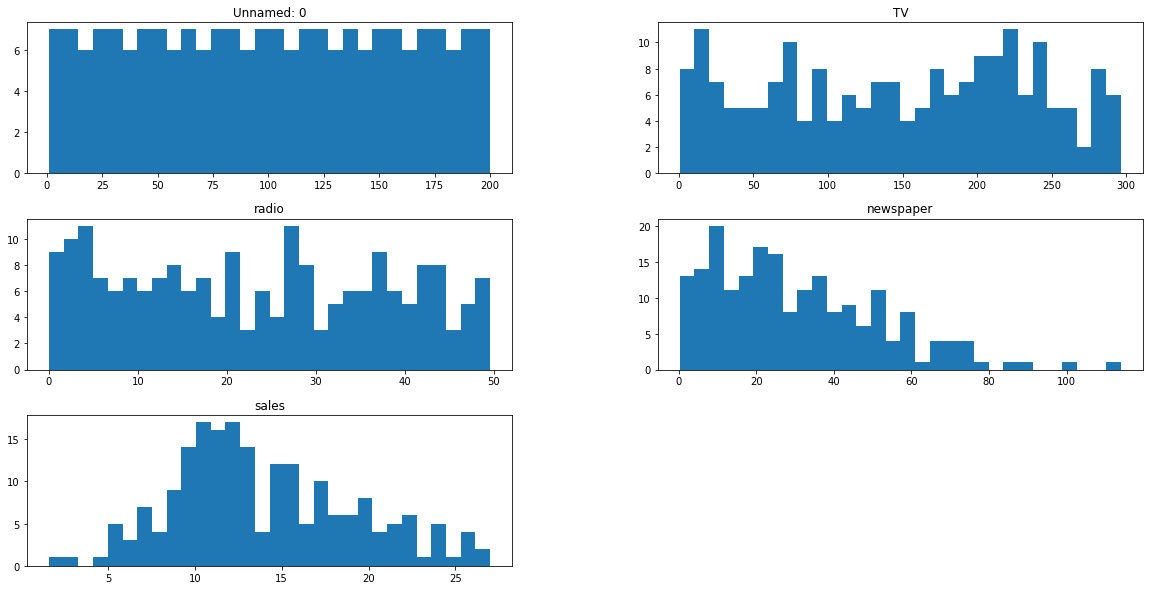

In [17]:
df.hist(figsize=(20,10), grid=False, layout=(3,2), bins = 30)

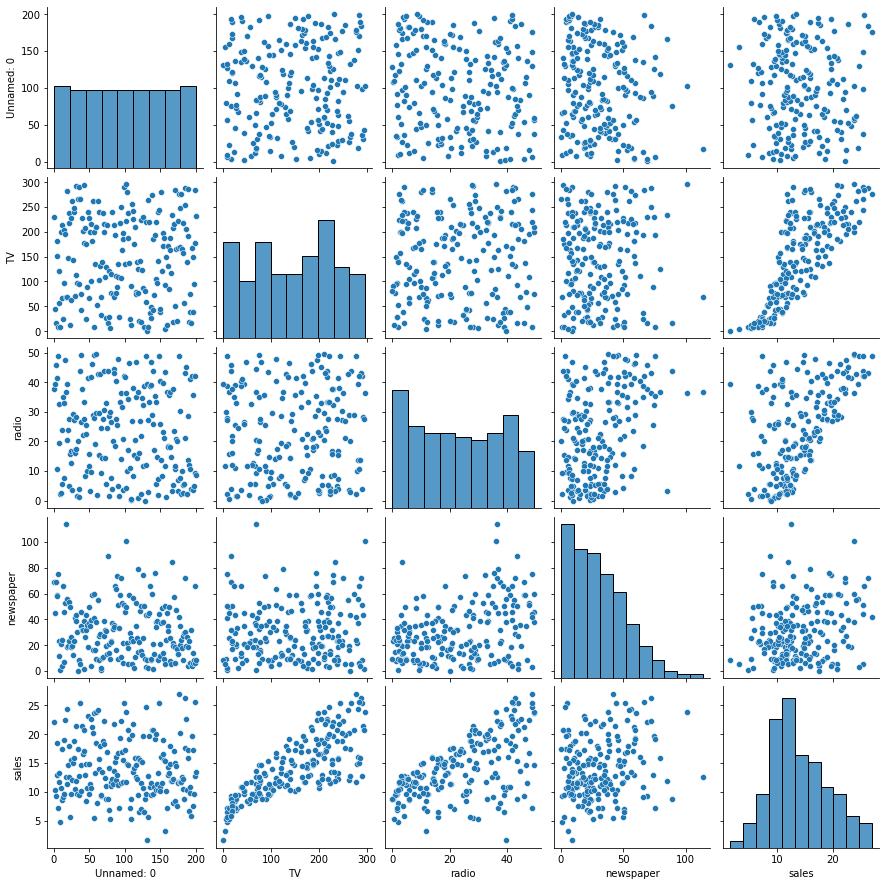

In [18]:
sns.pairplot(df)

### Coorelation

In [19]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [20]:
df.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

<AxesSubplot:>

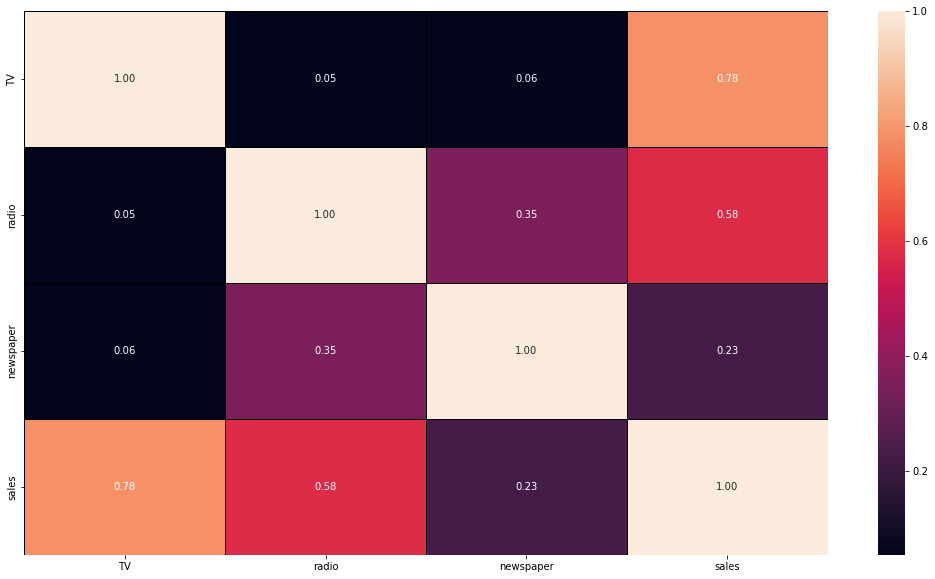

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

Outcome of Coorelation
1. Tv has a coorelation of 78% with the sales 
2. Radio has a coorelation of 58% with the sales
3. Newspaper has a coorelation of 23% with the sales 

Removing columns which are not required

In [22]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

### Descriptive Statistics

In [23]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

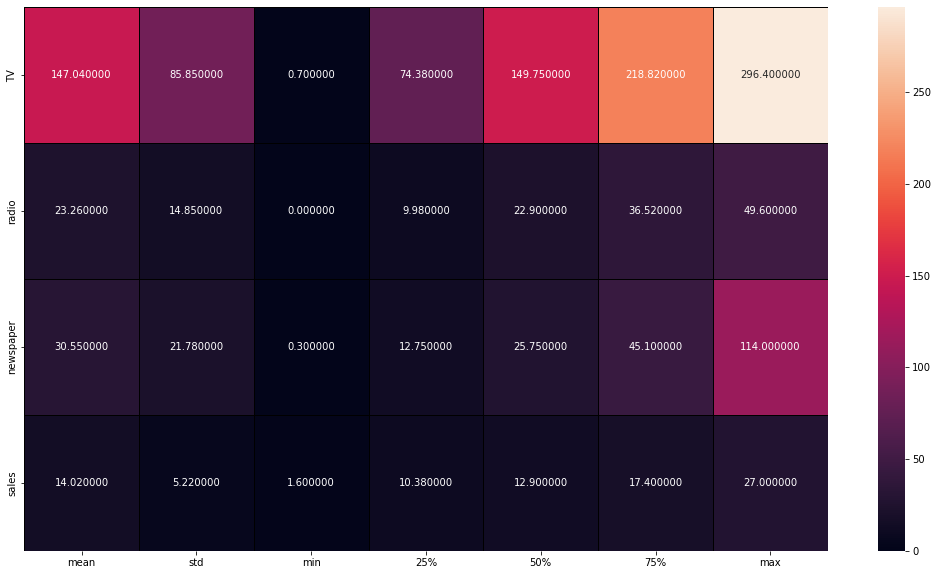

In [25]:
plt.figure(figsize=(18,10))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

### Checking skewness

In [26]:
df.iloc[:,:-1].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

Removing Skewness

In [27]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [28]:
df.iloc[:,:-1].skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
dtype: float64

### Checking Outliers

TV              AxesSubplot(0.125,0.657941;0.352273x0.222059)
radio        AxesSubplot(0.547727,0.657941;0.352273x0.222059)
newspaper       AxesSubplot(0.125,0.391471;0.352273x0.222059)
sales        AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

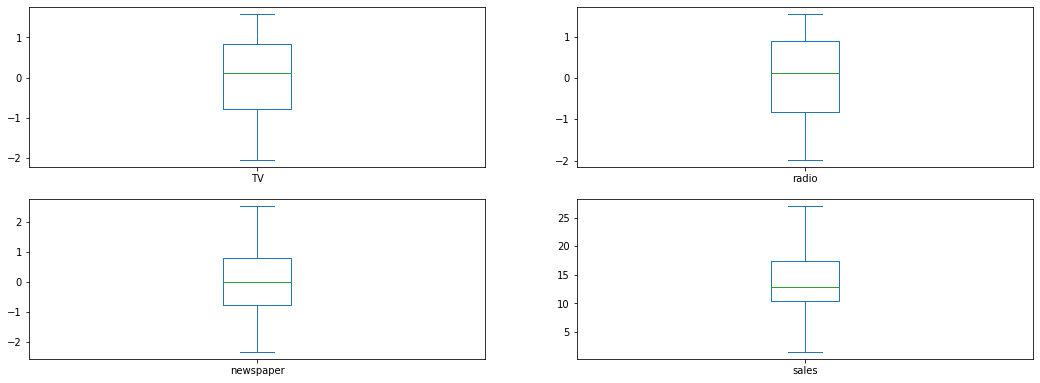

In [30]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(3,2), figsize=[18,10])

No outliers present in the dataset

<AxesSubplot:>

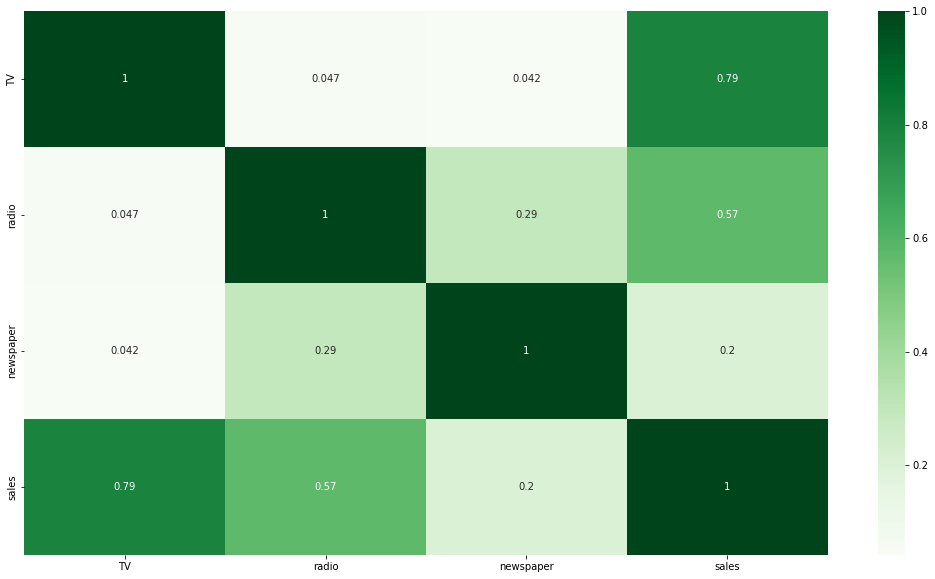

In [32]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),cmap="Greens",annot=True)

In [43]:
#independent Column
x=df.iloc[:,:-1]
#target
y=df.iloc[:,-1]

In [44]:
x

,TV,radio,newspaper
0,0.948674,0.962247,1.514335
1,-1.191314,1.040179,0.787683
2,-1.647757,1.370710,1.516998
3,0.141020,1.142387,1.214656
4,0.452715,-0.748651,1.211704
...,...,...,...
195,-1.287908,-1.431436,-0.682576
196,-0.520949,-1.297017,-1.142011
197,0.413091,-0.875492,-1.313050
198,1.455843,1.177722,1.433350


In [45]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [50]:
vif_calc()

   VIF Factor   features
0    1.003112         TV
1    1.094332      radio
2    1.093766  newspaper


No variance inflation in the Dataset

### Data Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643],
       [ 0.45271493, -0.74865064,  1.21170398],
       [-1.82382233,  1.51501853,  1.66502354],
       [-1.00249116,  0.69372704, -0.1077535 ],
       [-0.210275  , -0.10158544, -0.84409341],
       [-1.82609501, -1.63345378, -2.13259669],
       [ 0.64764492, -1.56676988, -0.22900395],
       [-0.88377378, -1.20298758, -0.07226156],
       [ 0.79708355,  0.18072579, -1.60261898],
       [-1.52641627,  0.81900563,  1.42512925],
       [-0.48036844, -1.02813642, -1.22982506],
       [ 0.69106577,  0.6992403 ,  0.81860579],
       [ 0.60295713,  1.45770359,  1.04432344],
       [-0.86079972,  0.89906999,  2.52943514],
       [ 1.4355201 ,  1.05563142,  1.13383286],
       [-0.84199328, -0.04209908, -0.39356015],
       [ 0.09508551,  0.17453165, -0.34671544],
       [ 0.8337607 ,  0.40367061,  1.059

### Using Linear Regression model

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score


for i in range(1,100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
  lr=LinearRegression()
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  print(f"At random state {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
  print(f"At random state {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
  print("\n")

At random state 1,the training accuracy is :- 90.71938747219684
At random state 1,the testing accuracy is :- 89.62223515318661


At random state 2,the training accuracy is :- 91.83341288802332
At random state 2,the testing accuracy is :- 81.34661880809733


At random state 3,the training accuracy is :- 90.44922374546076
At random state 3,the testing accuracy is :- 91.76823268482113


At random state 4,the training accuracy is :- 90.58334490016561
At random state 4,the testing accuracy is :- 89.99332568068063


At random state 5,the training accuracy is :- 90.57996837685972
At random state 5,the testing accuracy is :- 91.11155103873197


At random state 6,the training accuracy is :- 90.31637800959938
At random state 6,the testing accuracy is :- 92.63228920019166


At random state 7,the training accuracy is :- 90.24328978288425
At random state 7,the testing accuracy is :- 92.29594391045336


At random state 8,the training accuracy is :- 91.61168555487973
At random state 8,the testing acc

At random state 64,the training accuracy is :- 90.79142899545766
At random state 64,the testing accuracy is :- 89.64084075107654


At random state 65,the training accuracy is :- 90.43116058172039
At random state 65,the testing accuracy is :- 91.8132356871056


At random state 66,the training accuracy is :- 90.91938493251156
At random state 66,the testing accuracy is :- 89.96390781190254


At random state 67,the training accuracy is :- 91.11440876313132
At random state 67,the testing accuracy is :- 88.75870015335046


At random state 68,the training accuracy is :- 91.38243202034857
At random state 68,the testing accuracy is :- 85.89891563312658


At random state 69,the training accuracy is :- 90.14443993649188
At random state 69,the testing accuracy is :- 91.85233771378265


At random state 70,the training accuracy is :- 90.00269410692063
At random state 70,the testing accuracy is :- 92.38416154690941


At random state 71,the training accuracy is :- 91.85638639298016
At random state 71,

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=54)

### Linear Regression

In [54]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [12.86787808 10.12792407 17.42486532  6.6777674   9.57484826 11.79622808
 19.42255585 10.42904847 16.19284893 15.09346009  9.98557565 14.23909563
 16.6074724  17.41930172  8.95294381 22.9747748   8.77908638 13.92306952
 10.07128127 12.23280279 18.22601968 12.72966701 18.55415765 20.61428156
 13.91030029 14.01228954 11.47451807 23.50141965  9.77789755 14.40451074
 19.91617674  9.37266723 19.79871831 20.93091447 18.38604045 20.87815832
  6.67850619 15.50878929 19.98348018  6.08179799]
actual result 179    12.6
166     8.0
187    17.3
119     6.6
186    10.3
134    10.8
142    20.1
12      9.2
118    15.9
178    11.8
138     9.6
43     12.9
194    17.3
11     17.4
44      8.5
101    23.8
49      9.7
4      12.9
149    10.1
31     11.9
188    15.9
116    12.2
33     17.4
0      22.1
181    12.2
161    13.3
2       9.3
183    26.2
125    10.6
81     12.3
176    20.2
145    10.3
124    19.7
55     23.7
153    19.0
137    20.8
182     8.7
156    15.3
104    20.7
106     7.2


In [56]:
import numpy as np

In [57]:
print('Error:')
print('Mean_Absolute_Error :',mean_absolute_error(y_test,pred))
print('Mean_Squared_Error :',mean_squared_error(y_test,pred))
print('Root_Mean_Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

Error:
Mean_Absolute_Error : 1.0096684382685583
Mean_Squared_Error : 1.725741776908028
Root_Mean_Squared Error 1.3136749129476546
r2 score : 93.38858948468285


### Decision Tree Regression

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [59]:
pred=dtr.predict(x_test)
print("predicted_result ",pred)
print('actual_result',y_test)

predicted_result  [14.4  8.7 18.3  6.9 10.1 10.4 19.6  8.8 18.  12.7 10.1 12.2 15.  17.1
  7.  22.2  9.7 14.1 10.1 12.4 16.1 12.9 15.9 22.4 12.2 12.5  8.7 25.4
  9.7 11.9 18.9 10.5 19.4 23.8 18.5 20.2  8.1 14.7 19.6  6.9]
actual_result 179    12.6
166     8.0
187    17.3
119     6.6
186    10.3
134    10.8
142    20.1
12      9.2
118    15.9
178    11.8
138     9.6
43     12.9
194    17.3
11     17.4
44      8.5
101    23.8
49      9.7
4      12.9
149    10.1
31     11.9
188    15.9
116    12.2
33     17.4
0      22.1
181    12.2
161    13.3
2       9.3
183    26.2
125    10.6
81     12.3
176    20.2
145    10.3
124    19.7
55     23.7
153    19.0
137    20.8
182     8.7
156    15.3
104    20.7
106     7.2
Name: sales, dtype: float64


In [60]:
print('Error:')
print('Mean_Absolute_Error :',mean_absolute_error(y_test,pred))
print('Mean_Squared_Error :',mean_squared_error(y_test,pred))
print('Root_Mean_Squared_Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred)*100)

Error:
Mean_Absolute_Error : 0.7175
Mean_Squared_Error : 0.8302500000000002
Root_Mean_Squared_Error 0.9111805529092465
r2 score : 96.819267138461


### Regularization

In [61]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [62]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

90.15581613836716

### Ensemble Technique

In [63]:
from sklearn.ensemble import RandomForestRegressor
Rrf=RandomForestRegressor()

parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
clf = GridSearchCV(Rrf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [65]:
from sklearn.model_selection import cross_val_score

Rrf= RandomForestRegressor(criterion="mae",max_features="auto")
Rrf.fit(x_train,y_train)
Rrf.score(x_train,y_train)
pred_decession = Rrf.predict(x_test)

rfs = r2_score(y_test,pred_decession)
print('R2_Score :',rfs*100)

rfscore = cross_val_score(Rrf,x,y,cv=5)
rfc=rfscore.mean()
print('cross_Val_Score :',rfc*100)

R2_Score : 97.95963208469695
cross_Val_Score : 97.70170717073007


## Saving Model

In [66]:
import pickle
filename = 'Advertising Sales Channel Prediction Case Study.pkl'
pickle.dump(Rrf,open(filename,'wb'))

# Thanks